# Project: Investigate a Dataset - [tmdb_movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this notebook, we are going to explore and analyse the tmdb-movies dataset to answer some questions for analysis. We are going to see how each variables relates to the other.

**Column discriptions**

- homepage: Contains links to the movie's website.

- id: holds a movie's id

- original_title: This is the name of the movie.

- overview: Summary of the movie's plot.

- genres: Different genres in the movie.

- popularity: A score that shows how popular a movie is.

- production_companies: Companies that produced the movie.

- release_date: A date in which a movie was released.

- release_year: A year in which a movie was released.

- cast: Movie actors and actresses.

- director: name of the person who directed the movie.

- tagline: A movie tag.

- vote_average: An average rating for a movie.

- budget: The amount a movie spent for budget.

- revenue: The movie's revenue.

- imdb_id: An id assigned to a movie by imdb.

- keywords: keywords in the movie.

- budget_adj: Shows how the budget of the associated movie in terms of 2010 dollars, accounts for inflation over time.

- revenue_adj: Shows how the budget of the associated movie in terms of 2010 dollars, accounts for inflation over time. 



### Question(s) for Analysis
- What movie genre is associated with high average rating?
- Are movies with high budget associated high votes?
- Which genres are most popular from year to year? 
- What kinds of properties are associated with movies that have high revenues?
- Which production companies had the highest avearge vote?

**Import required packages**

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 25)

<a id='wrangling'></a>
## Data Wrangling

In [213]:
# Load Dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To get information about the dataset, lets use the `info` method. This method gives useful infomation about the data types, total number of columns and rows, and checks whether or not there are missing values.
As seen below, the dataset has total of 21 columns, 10866 rows.

**Check dataset information**

In [214]:
# Check for data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Checking for missing values in the dataset. There exist some mising values in some columns as seen below.
> **To-do:** Fill or drop missing values.

In [215]:
# check for missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Checking for duplicates returns a total number of one.
> **To-do:** Drop duplicates in data cleaning section.

In [216]:
# USe the isnull method to check for deplicates.
sum(df.duplicated())

1

Some columns are meaningless to our analysis, hence should be dropped.
> **To-do:** Drop meaningless columns in data cleaning section.

In [217]:
# columns that will not contribute to the analysis
useless_columns = ['id', 'imdb_id', 'homepage',  'tagline', 'keywords', 'overview',
                   'runtime',  'release_date']


### Data Cleaning
Lets carry out all the To-dos to get the data cleaned and trimmed so it can be perfect for the analysis. 
 

In [218]:
# drop useless columns
df.drop(useless_columns, axis=1, inplace=True)


In [219]:
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


**Dropping Duplicates**

In [220]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

It will not make sense to fill missing genres, director, production_companies with random values which will lead to wrong analtical results when analysing. Since these misssing values are not really plenty, it will make sense to just drop them.

**Dropping missing values.**

In [221]:
df.dropna(inplace=True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
> **To-do**: - Now lets begin to investigate the stated question(s), check for relationship between independent and dependent variables, plot visualizations and compute some descriptive statistics.

**Use describe function to get descriptive statistics of our dataset**
The descriptive statistics gives us some summary statistics about our data like the mean, median, minimum value in a column, a few to mention.

In [222]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


**Using histograms to see distribution of our dataset**

From the histograms the following could be observed:
- The popularity hist shows that so many movies had low popularity scores.
- The budget hist shows that so many movies had low budget.
- Similary, the revenue hist shows that many movies had low revenue income.
- The vote_average hist looks normally distributed.

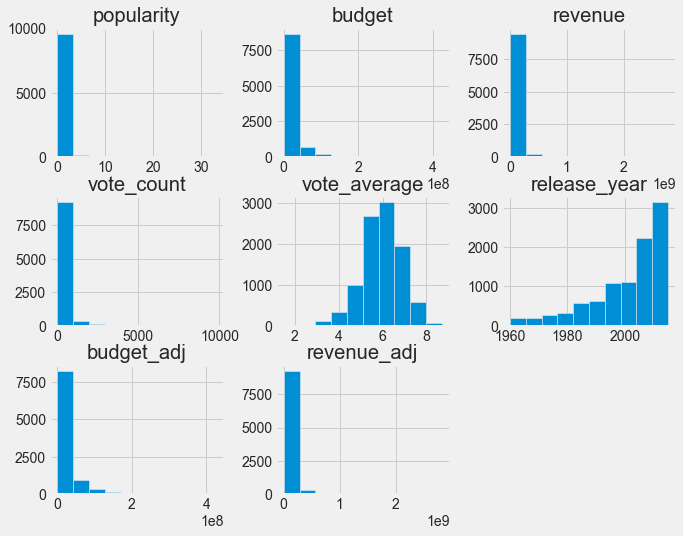

In [223]:
df.hist(figsize=(10,8));

### (1) What genre of movie is associated with high average vote?
In order to analysis this, we get a list of all the unique movie genres and filter the dataframe with it. This is done in the code cell below.

In [224]:
# List of unique movie genres
movie_genres = ['Action', 'Animation', 'Romance', 'Crime', 'Mystery', 'Western', 'Fantasy',
               'Music', 'Thriller', 'Adventure', 'Family','Drama', 'Comedy', 'Horror', 'History']

# filter by movie_genres
movie_genres_filter = df.query(f'{movie_genres} in genres')
movie_genres_filter.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
25,4.566713,150000000,682330139,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,Christopher McQuarrie,Action,Paramount Pictures|Skydance Productions|China ...,2349,7.1,2015,1.379999e+08,6.277435e+08
26,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,1666,6.3,2015,6.255997e+07,1.985944e+08
51,2.814802,35000000,194564672,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,Nancy Meyers,Comedy,Waverly Films|Warner Bros.,1255,7.1,2015,3.219999e+07,1.789994e+08
55,2.584264,20000000,36606743,Burnt,Bradley Cooper|Sienna Miller|Lily James|Alicia...,John Wells,Drama,Double Feature Films|PeaPie Films|3 Arts Enter...,631,6.3,2015,1.839999e+07,3.367819e+07
58,2.557859,15000000,64191523,The Danish Girl,Eddie Redmayne|Alicia Vikander|Matthias Schoen...,Tom Hooper,Drama,Pretty Pictures|Working Title Films|ArtÃ©mis P...,867,7.3,2015,1.379999e+07,5.905618e+07


Now that we hhave the filtered dataframe, we can then use the groupby method to groupby by unique movie genres and then calulate the mean of the `vote_average` column to see what movie genre is generally associated with high ratings. This is done in the code cell below.

In [225]:
genre_with_ratings = movie_genres_filter.groupby(['genres'])['vote_average'].mean().sort_values()
genre_with_ratings

genres
Crime        5.133333
Horror       5.166667
Action       5.480702
Thriller     5.485227
Adventure    5.545455
Comedy       5.787480
Fantasy      6.055556
Romance      6.100000
Family       6.170000
Drama        6.352978
Western      6.377778
Mystery      6.400000
Animation    6.468000
History      6.700000
Music        6.893750
Name: vote_average, dtype: float64

Using matplotlib to visualize the analysis, we see that the movie genre associated with high ratings on average is the **Music Genre** with rating of **6.89** followed by **History** and then **Animation**.

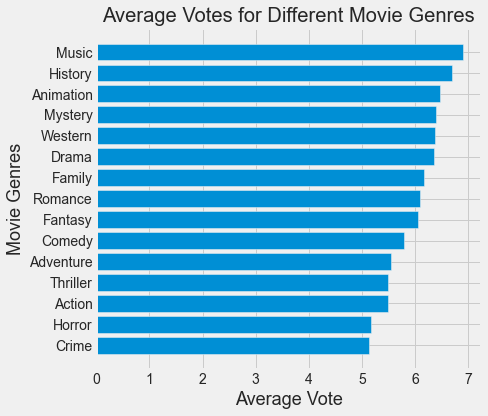

In [226]:
plt.figure(figsize=(7,6))
plt.barh(genre_with_ratings.index, genre_with_ratings);
plt.title('Average Votes for Different Movie Genres')
plt.xlabel("Average Vote", fontsize=18);
plt.ylabel('Movie Genres', fontsize=18)
plt.tight_layout()


### (2) Are movies with high budget associated high votes?
Here we want to find out if there's correlation between movie budget and vote_average. To answer this question, lets change the budget column from continous values to 3 discrete values (Low_budget, med_budget, high_budget) to know which movie belonged to any of this group. A new variable, `budget_type` is then added to the dataframe to hold these discrete values.


In [227]:
# Using pandas cut method to discretize the budget column
df['budget_type'] = pd.cut(df['budget'], 3, labels=['Low_budget', 'Med_budget', 'High_budget'])

In [228]:
budget_group = df.groupby(['budget_type'])['vote_average'].mean()
budget_group

budget_type
Low_budget     5.955747
Med_budget     6.461905
High_budget    6.500000
Name: vote_average, dtype: float64

Plotting the results on a pie chart shows that movies with high budget tend to get high ratings on average. We see that the high budget movies take a large amount of the pie slice.

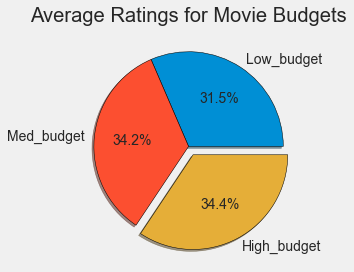

In [229]:
explode = [0, 0, 0.1]
plt.pie(budget_group, wedgeprops={'edgecolor':'black'},
        autopct='%1.1f%%', shadow=True,
        labels=budget_group.index, explode=explode);
plt.title('Average Ratings for Movie Budgets')
plt.tight_layout()

### (3) What kinds of properties are associated with movies that have high revenues?
To answer this question, we filter the dataframe with revenues greater than the 75th percentile since  there is no median value and then use the describe method to see properties of movies with high revenues.

In [230]:
# Using describe method on the revenue column to extract the 75% value.
df['revenue'].describe()

count    9.772000e+03
mean     4.423121e+07
std      1.225889e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.104729e+07
max      2.781506e+09
Name: revenue, dtype: float64

**Filter dataframe with revenues greater than 3.104729e+07**

In [231]:
# Using query to filter
high_rev = df.query('revenue >=  3.104729e+07')
high_rev.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2443.000000,2.443000e+03,2.443000e+03,2443.000000,2443.000000,2443.000000,2.443000e+03,2.443000e+03
mean,1.533601,4.847537e+07,1.671623e+08,751.466639,6.270487,2001.520262,5.629388e+07,2.122191e+08
std,1.718381,4.742135e+07,1.995560e+08,1022.225992,0.746875,10.890448,4.946757e+07,2.430006e+08
min,0.010335,0.000000e+00,3.106304e+07,10.000000,3.400000,1960.000000,0.000000e+00,2.906489e+07
25%,0.670672,1.500000e+07,5.467839e+07,170.000000,5.800000,1996.000000,2.099521e+07,7.248137e+07
50%,1.094959,3.500000e+07,9.833730e+07,374.000000,6.300000,2004.000000,4.267270e+07,1.287685e+08
75%,1.793176,6.650000e+07,1.923918e+08,872.000000,6.800000,2010.000000,7.933532e+07,2.522067e+08
max,32.985763,3.800000e+08,2.781506e+09,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


From the descriptive statistics, we can see that movie with high revenues tend to have the following propertise:
- High average votes.
- High budget.
- High popularity scores.

### (4) Which genres are most popular from year to year? 
To answer this question, lets take only the last five years to see which movie genres are most popular from year to year.

In [232]:
# Use query to filter the last five years
last_five_years = df.query('release_year >= 2011')
last_five_years.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_type
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Med_budget
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Med_budget
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Low_budget
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,Med_budget
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,Med_budget


To see which genres are most popular, we calculate the median value of the `popularity` column and use this as a mask to filter dataframe that has a popularity score greater than the median value.

In [233]:
# Calculate median value of the popularity column.
median_popularity = last_five_years['popularity'].median()
median_popularity

0.42928750000000004

**Filtering out the dataframe greater than the median value.**

In [234]:
# Filter out dataframe with high popularity score
popular_genres = last_five_years.query(f'popularity >= {median_popularity}')
popular_genres.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_type
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Med_budget
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Med_budget
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Low_budget
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,Med_budget
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,Med_budget


Now that we have the filtered dataframe with high popularity scores, lets also filter out the dataframe with unique movie genres.

In [235]:
# Use query to filter unique movie genres.
movie_genres_filter = popular_genres.query(f'{movie_genres} in genres')

Finally, we ccan then groupby release_year and genre and then calculate the sum of the popularity scores to get the genres that are most popular from year to year. This is done in the coe cell below.

In [236]:
# Use groupby method to groupby year and genre.
most_popular_genre = movie_genres_filter.groupby(['release_year', 'genres'])['popularity'].sum()
most_popular_genre

release_year  genres   
2011          Action        2.089918
              Animation     1.237466
              Comedy       21.386227
              Drama        10.385317
              Family        0.767071
              Horror        3.311129
              Music         0.451669
              Thriller      3.322754
2012          Action        1.291659
              Adventure     1.507337
              Animation     1.262799
              Comedy       13.223433
              Drama        13.900380
              Horror        1.944469
              Thriller      5.252498
2013          Action        0.470299
              Adventure     0.718403
              Comedy       21.360231
              Drama        15.717872
              Family        0.523153
              Horror        3.808249
              Romance       0.967950
              Thriller      3.295443
2014          Action        2.945526
              Adventure     1.864870
              Animation     0.725460
              

From the horinzontal bar chart, we can see that the most popular movie genres from year to year are **comedy and Drama.**

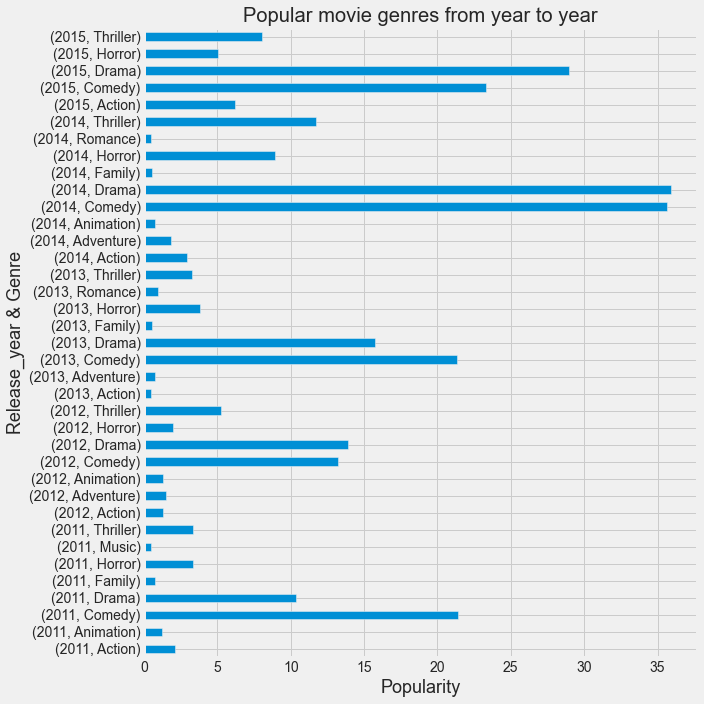

In [237]:
# colors = ['blue', 'blue', 'yellow', 'green', 'green']
most_popular_genre.plot(kind='barh', figsize=(10,10),title = 'Popular movie genres from year to year')
plt.ylabel('Release_year & Genre', fontsize=18)
plt.xlabel('Popularity', fontsize=18)
plt.tight_layout()

### (5) Which production companies had the highest avearge vote?
Lets groupby production companies and then calulate the mean of the vote_average column to see which production companies had the highest average ratings.

In [270]:
prod_comp_votes = df.groupby(['production_companies'])['vote_average'].mean().sort_values(ascending=False)
prod_comp_votes.head()

production_companies
SMV Enterprises|Columbia Music Video|EMI              8.7
Red Bull Media House|Brain Farm Digital Cinema        8.5
Edel records GmbH                                     8.5
Miramax Films|British Film Institute (BFI)            8.5
Blumhouse Productions|Hit the Ground Running Films    8.4
Name: vote_average, dtype: float64

From the bar chart, the production companies with the highest vote is **SMV Enterprises|Columbia Music Video|EMI**.

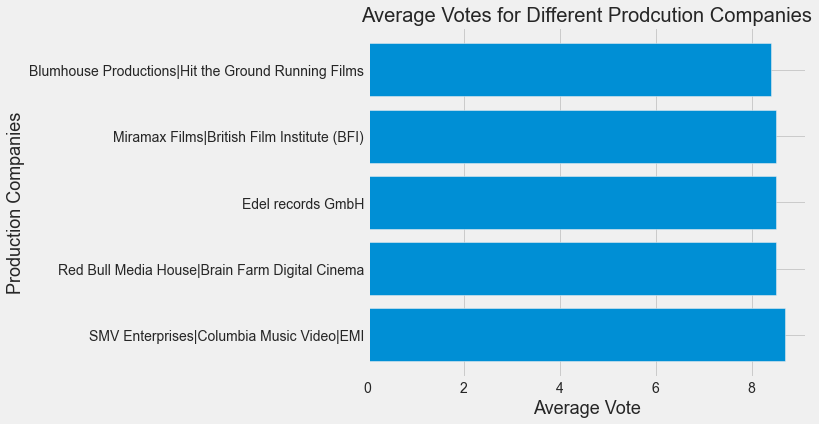

In [271]:
plt.figure(figsize=(7,6))
plt.barh(prod_comp_votes.index[:5], prod_comp_votes[:5]);
plt.title('Average Votes for Different Prodcution Companies')
plt.xlabel("Average Vote", fontsize=18);
plt.ylabel('Production Companies', fontsize=18);

<a id='conclusions'></a>
## Conclusions
Having perfromed the analysis on the tmdb-movies.csv dataset, the followings conclusions were drawn:

- The Top three movie genres with high average ratings are Music, History and Animation with Music being the highest with an   average rating of 6.89. It does seem like people do really love musical movies.

- It was also discovered that movie that spent more on budget generally had higher vote ratings that movies that had low budget. Thus we can say there's correlation between these variables.

- Also, movies with high revenus had high vote counts, high popularity scores, and high average ratings.

- The most popular movies from one year to the other were Comedy and Drama.

- Finally, from the last question, it can be seen that the production companies with the highest average vote was SMV Enterprises|Columbia Music Video|EMI. I think this is why music genre had the highest vote ratings.

However, further analysis could still be done on this dataset to answer questions like **"how did the movie casts affect the ratings of the movie"** Also, how would these columns, `budget_adj and revenue_adj` affect the analysis could be further explored to answer some more techinical questions.

Although, some conclusions were made using plots, my analysis did not include or use any statical tests such as ANOVA, chi-square test or t-test to make a more concrete conclusions.